# 0. Install & Import Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import plotly.offline as pyoff
import plotly.graph_objs as go

import datetime as dt


import warnings
warnings.filterwarnings("ignore")

# 1. Load Data

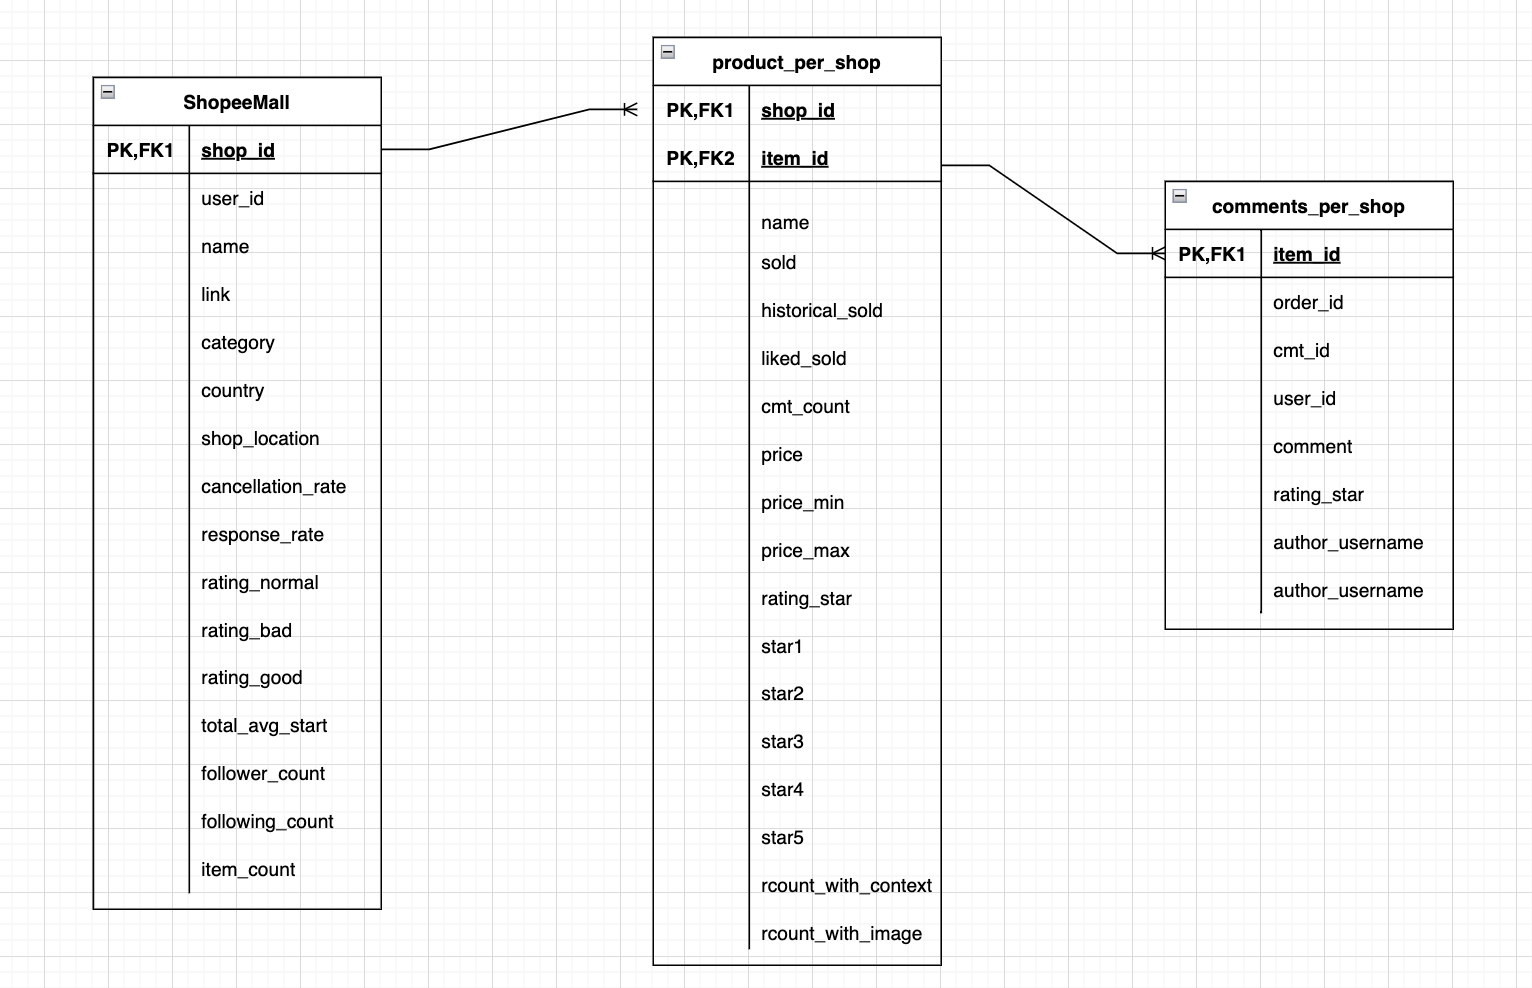

In [8]:
#@title Entity Ralationship Diagram
#@ Neural Network Architecture
from IPython.display import Image, display
# Image('/content/Screen Shot 2022-05-26 at 10.37.00.png')
# Image("bp.png", width=100, height=100)
display(Image('/content/Screen Shot 2022-07-16 at 09.49.54.png',width=1000, height=700))



In [110]:
shopee_mall=pd.read_csv('/content/drive/MyDrive/Assignment_DataMining/Data/ShopeeMall.csv')
shopee_mall=shopee_mall.drop(['index'],1)
########################################################################################################################
product=pd.read_csv('/content/drive/MyDrive/Assignment_DataMining/Data/product.csv')
product=product.drop(['index'],1)
########################################################################################################################
comments=pd.read_csv('/content/drive/MyDrive/Assignment_DataMining/Data/comments.csv')
comments=comments.drop(['index'],1)

In [4]:
shopee_mall.describe()

,user_id,shop_id,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count
count,1.220000e+02,1.220000e+02,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,2.232342e+08,2.232271e+08,1.434426,79.385246,189.098361,113.221311,13801.639344,4.898401,71295.286885,60.688525,378.549180
std,1.741733e+08,1.741674e+08,10.394681,19.354649,365.851648,277.310654,32766.147795,0.076886,121099.633602,182.549125,1117.872737
min,1.515800e+04,1.515800e+04,0.000000,9.000000,0.000000,0.000000,0.000000,4.551724,4.000000,0.000000,6.000000
25%,8.959422e+07,8.959274e+07,0.000000,66.250000,3.000000,2.000000,242.250000,4.860788,2409.000000,1.000000,52.000000
50%,1.974282e+08,1.974252e+08,0.000000,84.500000,36.500000,17.000000,3262.500000,4.913418,17621.500000,5.000000,105.000000
75%,3.215205e+08,3.215010e+08,0.000000,95.000000,202.000000,78.000000,11769.500000,4.944987,91330.250000,27.250000,278.000000
max,7.691207e+08,7.691369e+08,100.000000,100.000000,2742.000000,2242.000000,277610.000000,5.000000,776853.000000,1250.000000,11319.000000


In [103]:
product.describe()

,item_id,shop_id,sold,historical_sold,liked_count,cmt_count,price,price_min,price_max,rating_star,start1,start2,start3,start4,start5,rcount_with_context,rcount_with_image
count,6.720000e+03,6.720000e+03,6720.000000,6720.000000,6720.000000,6720.000000,6.720000e+03,6.720000e+03,6.720000e+03,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000
mean,8.639002e+09,1.864040e+08,19.982440,285.968899,569.648512,97.868155,1.519194e+11,1.519194e+11,1.544377e+11,3.722622,0.674107,0.349107,0.975744,2.834077,92.984673,50.177381,41.598065
std,5.413205e+09,1.496890e+08,150.033535,1228.255391,3683.925785,435.252441,4.995277e+11,4.995277e+11,5.016425e+11,2.096683,4.966300,2.129635,4.386232,12.299216,414.947640,247.655070,218.450040
min,1.895080e+07,1.515800e+04,0.000000,0.000000,0.000000,0.000000,1.590000e+08,1.590000e+08,2.000000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.314262e+09,6.352192e+07,0.000000,2.000000,2.000000,1.000000,1.290000e+10,1.290000e+10,1.450000e+10,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,7.768569e+09,1.630680e+08,1.000000,28.000000,15.000000,10.000000,2.890000e+10,2.890000e+10,2.990000e+10,4.909091,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,3.000000
75%,1.256636e+10,2.808308e+08,6.000000,141.000000,76.000000,50.000000,8.260000e+10,8.260000e+10,8.500000e+10,5.000000,0.000000,0.000000,1.000000,1.000000,47.000000,24.000000,18.000000
max,2.192061e+10,7.691369e+08,6492.000000,32074.000000,55215.000000,12766.000000,1.199900e+13,1.199900e+13,1.199900e+13,5.000000,320.000000,124.000000,165.000000,315.000000,12066.000000,8455.000000,7781.000000


In [104]:
comments.describe()

,order_id,item_id,cmt_id,user_id,rating_star
count,7.096000e+03,7.096000e+03,7.096000e+03,7.096000e+03,7096.000000
mean,8.482941e+13,6.119737e+09,6.159238e+09,1.419879e+08,4.872886
std,1.949335e+13,3.449056e+09,1.859323e+09,1.459149e+08,0.548088
min,1.245901e+09,1.358832e+09,1.193797e+09,1.349100e+04,1.000000
25%,7.217343e+13,3.555423e+09,4.578312e+09,3.922400e+07,5.000000
50%,8.881044e+13,5.554338e+09,6.534307e+09,8.527967e+07,5.000000
75%,9.826405e+13,7.922123e+09,7.538791e+09,1.989679e+08,5.000000
max,1.115550e+14,2.110426e+10,8.982545e+09,7.961818e+08,5.000000


# 2. Exploratory Data Analysis

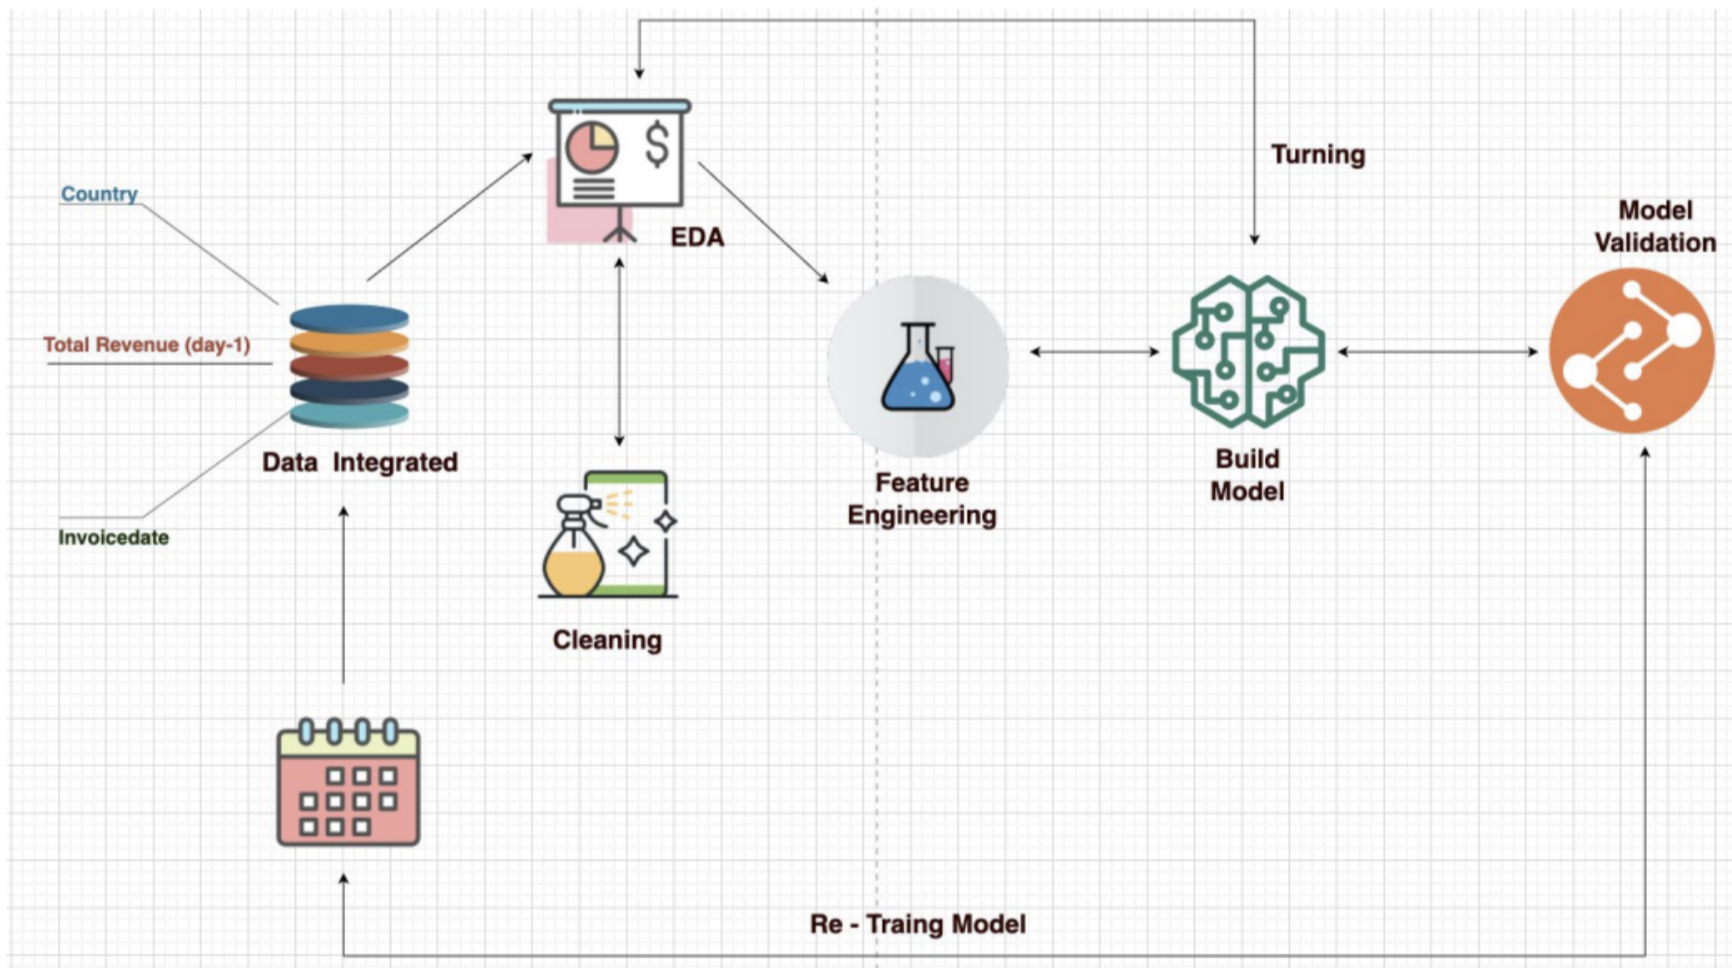

In [9]:
display(Image('/content/Screen Shot 2022-07-16 at 10.06.46.png',width=1500, height=700))

## 2.1 Shopee Mall

In [ ]:
shopee_mall.head()

,name,link,category,country,shop_location,user_id,shop_id,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count
0,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,1290,50564,4.828419,776853,7,11319
1,Aolikes Sports,https://shopee.vn/aolikessports,Thể Thao & Du Lịch,VN,Hà Nội,219839547,219835490,0,72,33,5,1235,4.872727,4336,7,179
2,Bamozo,https://shopee.vn/bamozo_official,Thể Thao & Du Lịch,VN,Hà Nội,81332290,81330814,0,96,206,64,12063,4.894520,85887,166,58
3,Camp Out,https://shopee.vn/campout.vn,Thể Thao & Du Lịch,VN,Khánh Hòa,373470172,373450595,0,71,5,2,436,4.940048,4328,5,136
4,Decathlon,https://shopee.vn/decathlon_vietnam,Thể Thao & Du Lịch,VN,Hà Nội,272531715,272527398,0,96,340,92,22710,4.919975,141628,1,1076


In [11]:
#@title Describe Data Category
shopee_mall[['name','link','category','country','shop_location']].describe()

,name,link,category,country,shop_location
count,122,122,122,122,122
unique,118,117,25,1,8
top,Biti's,https://shopee.vn/bitisvn,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh
freq,2,2,5,122,70


In [12]:
#@title Describe Data Numeric
shopee_mall[['cancellation_rate','response_rate','rating_normal','rating_bad','rating_good','total_avg_star','follower_count','following_count','item_count']].describe()

,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,1.434426,79.385246,189.098361,113.221311,13801.639344,4.898401,71295.286885,60.688525,378.549180
std,10.394681,19.354649,365.851648,277.310654,32766.147795,0.076886,121099.633602,182.549125,1117.872737
min,0.000000,9.000000,0.000000,0.000000,0.000000,4.551724,4.000000,0.000000,6.000000
25%,0.000000,66.250000,3.000000,2.000000,242.250000,4.860788,2409.000000,1.000000,52.000000
50%,0.000000,84.500000,36.500000,17.000000,3262.500000,4.913418,17621.500000,5.000000,105.000000
75%,0.000000,95.000000,202.000000,78.000000,11769.500000,4.944987,91330.250000,27.250000,278.000000
max,100.000000,100.000000,2742.000000,2242.000000,277610.000000,5.000000,776853.000000,1250.000000,11319.000000


In [27]:
shopee_mall.loc[shopee_mall['response_rate']==shopee_mall.response_rate.min()]

,name,link,category,country,shop_location,user_id,shop_id,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count,Minimum
21,Acwell Official Vietnam,https://shopee.vn/acwell_vn,Sắc Đẹp,VN,Hà Nội,425145122,425125545,0,9,0,0,83,4.975,322,1,17,0


In [33]:
shopee_mall.loc[shopee_mall['total_avg_star']==shopee_mall.total_avg_star.max()]

,name,link,category,country,shop_location,user_id,shop_id,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count,Minimum
14,Cà phê sạch,https://shopee.vn/caphesachorg,Bách hóa Online,VN,TP. Hồ Chí Minh,237244259,237239065,0,100,0,0,42,5.0,57043,10,34,0
27,bebapcon123,https://shopee.vn/bebapcon123,Máy tính & Laptop,VN,Đà Nẵng,67353543,67352086,0,57,0,0,0,5.0,4,1,47,0
29,Dell Hàng Chính Hiệu,https://shopee.vn/dell_flagship_hch_store,Máy tính & Laptop,VN,TP. Hồ Chí Minh,409675135,409655558,0,84,0,0,2,5.0,57,2,59,0
31,Chim Cánh Cụt Travel JSC,https://shopee.vn/chimcanhcutjsc,Voucher & Dịch vụ,VN,TP. Hồ Chí Minh,442198343,442178766,0,34,0,0,47,5.0,61,1,25,0
32,MIC Official Store,https://shopee.vn/baohiemquandoi_mic_official,Voucher & Dịch vụ,VN,Hà Nội,449211127,449191550,0,91,0,0,309,5.0,4914,9,6,0
33,Việt Úc Tourist Store,https://shopee.vn/vietuctourist.store,Voucher & Dịch vụ,VN,TP. Hồ Chí Minh,584832338,584812753,0,72,0,0,6,5.0,89,1,17,0
54,cooperlpetpremium,https://shopee.vn/cooperlpetpremium,Thú cưng,VN,TP. Hồ Chí Minh,378397905,378378328,0,57,0,0,144,5.0,12528,90,15,0
81,Julius Như Quỳnh,https://shopee.vn/nhuquynhwatchjulius,Đồng Hồ,VN,Khánh Hòa,118352787,118350963,0,79,0,0,74,5.0,1874,235,658,0
91,forshoes.vn,https://shopee.vn/forshoes.vn,Giày Dép Nam,VN,Hải Phòng,446783759,446764182,2,98,0,0,165,5.0,310,3,51,0
110,cleansui_official_store,https://shopee.vn/toshiba_hcm_store,Thiết Bị Điện Gia Dụng,VN,TP. Hồ Chí Minh,720985766,720966181,0,75,0,0,1,5.0,23,1,218,0


In [34]:
shopee_mall.loc[shopee_mall['total_avg_star']==shopee_mall.total_avg_star.min()]

,name,link,category,country,shop_location,user_id,shop_id,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count,Minimum
35,Ekleva,https://shopee.vn/ekleva.vn,Máy ảnh - Máy quay phim,VN,Quốc Tế,200755244,200752110,0,68,3,1,25,4.551724,61,0,55,0


In [35]:
shopee_mall.loc[shopee_mall['follower_count']==shopee_mall.follower_count.min()]

,name,link,category,country,shop_location,user_id,shop_id,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count,Minimum
27,bebapcon123,https://shopee.vn/bebapcon123,Máy tính & Laptop,VN,Đà Nẵng,67353543,67352086,0,57,0,0,0,5.0,4,1,47,0


In [36]:
shopee_mall.loc[shopee_mall['follower_count']==shopee_mall.follower_count.max()]

,name,link,category,country,shop_location,user_id,shop_id,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count,Minimum
0,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,1290,50564,4.828419,776853,7,11319,7


In [37]:
shopee_mall.loc[shopee_mall['item_count']==shopee_mall.item_count.max()]

,name,link,category,country,shop_location,user_id,shop_id,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count,Minimum
0,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,1290,50564,4.828419,776853,7,11319,7


In [38]:
shopee_mall.loc[shopee_mall['item_count']==shopee_mall.item_count.min()]

,name,link,category,country,shop_location,user_id,shop_id,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count,Minimum
32,MIC Official Store,https://shopee.vn/baohiemquandoi_mic_official,Voucher & Dịch vụ,VN,Hà Nội,449211127,449191550,0,91,0,0,309,5.0,4914,9,6,0


## 2.2 Product

In [111]:
product['price']=product['price']/10000
product['price_min']=product['price_min']/10000
product['price_max']=product['price_max']/10000
product['price']=product['price']/10
product['price_min']=product['price_min']/10
product['price_max']=product['price_max']/10
product

,item_id,shop_id,name,sold,historical_sold,liked_count,cmt_count,price,price_min,price_max,rating_star,start1,start2,start3,start4,start5,rcount_with_context,rcount_with_image
0,6055342998,71009635,Dép adidas SWIM Nữ Dép xỏ ngón Comfort Màu đen...,0,406,127,160,800000.0,800000.0,800000.0,4.868750,1,1,1,12,145,57,40
1,5554337612,71009635,Tất Ẩn adidas TRAINING Unisex Bộ 3 đôi tất thấ...,13,467,46,139,350000.0,350000.0,350000.0,4.899281,1,0,2,6,130,30,30
2,4855344455,71009635,Tất Ẩn adidas ORIGINALS Unisex 3 đôi tất Trefo...,5,299,51,110,400000.0,400000.0,400000.0,4.909091,0,1,2,3,104,32,26
3,5555302278,71009635,Áo Tee adidas RUNNING Nam Áo Thun Own the Run ...,12,226,31,46,750000.0,750000.0,750000.0,5.000000,0,0,0,0,46,10,8
4,6986004884,71009635,Dép adidas ORIGINALS Nam Adilette Lite Slides ...,9,89,59,17,800000.0,800000.0,800000.0,5.000000,0,0,0,0,17,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,13128097364,66373508,[Mã BMLTA50 giảm đến 50K đơn 99K] Giày Cao Gót...,0,4,3,1,395000.0,395000.0,395000.0,5.000000,0,0,0,0,1,0,0
6716,12927547738,66373508,[Mã BMLTA50 giảm đến 50K đơn 99K] Giày Búp Bê ...,0,2,1,1,269500.0,269500.0,385000.0,5.000000,0,0,0,0,1,1,1
6717,11716643066,66373508,[Mã BMLTA50 giảm đến 50K đơn 99K] Sandal Cao G...,0,0,3,0,594000.0,594000.0,990000.0,0.000000,0,0,0,0,0,0,0
6718,11193584589,66373508,[Mã BMLTA50 giảm đến 50K đơn 99K] Dép Sandal đ...,2,3,4,1,327250.0,327250.0,327250.0,5.000000,0,0,0,0,1,1,1


In [101]:
product

,item_id,shop_id,name,sold,historical_sold,liked_count,cmt_count,price,price_min,price_max,rating_star,start1,start2,start3,start4,start5,rcount_with_context,rcount_with_image,revenue
0,6055342998,71009635,Dép adidas SWIM Nữ Dép xỏ ngón Comfort Màu đen...,0,406,127,160,8000000.0,80000000000,80000000000,4.868750,1,1,1,12,145,57,40,0
1,5554337612,71009635,Tất Ẩn adidas TRAINING Unisex Bộ 3 đôi tất thấ...,13,467,46,139,3500000.0,35000000000,35000000000,4.899281,1,0,2,6,130,30,30,455000000000
2,4855344455,71009635,Tất Ẩn adidas ORIGINALS Unisex 3 đôi tất Trefo...,5,299,51,110,4000000.0,40000000000,40000000000,4.909091,0,1,2,3,104,32,26,200000000000
3,5555302278,71009635,Áo Tee adidas RUNNING Nam Áo Thun Own the Run ...,12,226,31,46,7500000.0,75000000000,75000000000,5.000000,0,0,0,0,46,10,8,900000000000
4,6986004884,71009635,Dép adidas ORIGINALS Nam Adilette Lite Slides ...,9,89,59,17,8000000.0,80000000000,80000000000,5.000000,0,0,0,0,17,6,5,720000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,13128097364,66373508,[Mã BMLTA50 giảm đến 50K đơn 99K] Giày Cao Gót...,0,4,3,1,3950000.0,39500000000,39500000000,5.000000,0,0,0,0,1,0,0,0
6716,12927547738,66373508,[Mã BMLTA50 giảm đến 50K đơn 99K] Giày Búp Bê ...,0,2,1,1,2695000.0,26950000000,38500000000,5.000000,0,0,0,0,1,1,1,0
6717,11716643066,66373508,[Mã BMLTA50 giảm đến 50K đơn 99K] Sandal Cao G...,0,0,3,0,5940000.0,59400000000,99000000000,0.000000,0,0,0,0,0,0,0,0
6718,11193584589,66373508,[Mã BMLTA50 giảm đến 50K đơn 99K] Dép Sandal đ...,2,3,4,1,3272500.0,32725000000,32725000000,5.000000,0,0,0,0,1,1,1,65450000000


In [61]:
sold=product[['shop_id','name','sold','historical_sold']]
mall=shopee_mall[['name','shop_id']]
merg_sold=pd.merge(sold, mall,on=['shop_id'])
merg_sold.columns=['shop_id','name_product','sold','historical_sold','name_store']
merg_sold.head()

,shop_id,name_product,sold,historical_sold,name_store
0,71009635,Dép adidas SWIM Nữ Dép xỏ ngón Comfort Màu đen...,0,406,Adidas Official Store
1,71009635,Tất Ẩn adidas TRAINING Unisex Bộ 3 đôi tất thấ...,13,467,Adidas Official Store
2,71009635,Tất Ẩn adidas ORIGINALS Unisex 3 đôi tất Trefo...,5,299,Adidas Official Store
3,71009635,Áo Tee adidas RUNNING Nam Áo Thun Own the Run ...,12,226,Adidas Official Store
4,71009635,Dép adidas ORIGINALS Nam Adilette Lite Slides ...,9,89,Adidas Official Store


In [73]:
max_sold_product = merg_sold.groupby(['name_product'])['sold'].max().reset_index().sort_values(by=['sold'],ascending=False).head(10)
max_sold_product_store=pd.merge(max_sold_product, merg_sold,on=['name_product'])
max_sold_product_store

,name_product,sold_x,historical_sold,name_store
0,Áo thun unisex CAPMAN basic TEE phom rộng tay ...,6492,25993,CAPMAN
1,Áo thun unisex CAPMAN basic TEE phom rộng tay ...,6492,11179,CAPMAN
2,[Mã MKBOBJU giảm 12% đơn từ 400K] Tã quần Bobb...,3937,4033,Bobby
3,Mũ bucket trơn vành cụp chính hãng CAPMAN phon...,2829,12250,CAPMAN
4,Áo thun nam cổ tròn basic CAPMAN vải cotton dà...,2009,27372,CAPMAN
5,[Mã MKBOBJU giảm 12% đơn từ 400K] Tã dán sơ si...,1674,7190,Bobby
6,Mũ lưỡi trai trơn chính hãng CAPMAN thể thao u...,1626,15323,CAPMAN
7,[Mã MKBOBJU giảm 12% đơn từ 400K] Combo 2 Gói ...,1531,1583,Bobby
8,[Mã ELAP500K giảm 8% đơn 500K] Apple AirPods w...,1406,23682,Apple
9,[Mã MKBOBJU giảm 12% đơn từ 400K] Tã dán sơ si...,1387,9809,Bobby


In [76]:
max_sold_product_store

,name_product,sold_x,historical_sold,name_store,percentange_product_sold
0,Áo thun unisex CAPMAN basic TEE phom rộng tay ...,6492,25993,CAPMAN,0.249760
1,Áo thun unisex CAPMAN basic TEE phom rộng tay ...,6492,11179,CAPMAN,0.580732
2,[Mã MKBOBJU giảm 12% đơn từ 400K] Tã quần Bobb...,3937,4033,Bobby,0.976196
3,Mũ bucket trơn vành cụp chính hãng CAPMAN phon...,2829,12250,CAPMAN,0.230939
4,Áo thun nam cổ tròn basic CAPMAN vải cotton dà...,2009,27372,CAPMAN,0.073396
5,[Mã MKBOBJU giảm 12% đơn từ 400K] Tã dán sơ si...,1674,7190,Bobby,0.232823
6,Mũ lưỡi trai trơn chính hãng CAPMAN thể thao u...,1626,15323,CAPMAN,0.106115
7,[Mã MKBOBJU giảm 12% đơn từ 400K] Combo 2 Gói ...,1531,1583,Bobby,0.967151
8,[Mã ELAP500K giảm 8% đơn 500K] Apple AirPods w...,1406,23682,Apple,0.059370
9,[Mã MKBOBJU giảm 12% đơn từ 400K] Tã dán sơ si...,1387,9809,Bobby,0.141401


In [78]:
max_sold_product_store.groupby(['name_product'])['percentange_product_sold'].max().reset_index().sort_values(by=['percentange_product_sold'],ascending=False).head(10)

,name_product,percentange_product_sold
7,[Mã MKBOBJU giảm 12% đơn từ 400K] Tã quần Bobb...,0.976196
4,[Mã MKBOBJU giảm 12% đơn từ 400K] Combo 2 Gói ...,0.967151
2,[MKB Gift] Ô tô đồ chơi xúc cát Bobby,0.816716
9,Áo thun unisex CAPMAN basic TEE phom rộng tay ...,0.580732
5,[Mã MKBOBJU giảm 12% đơn từ 400K] Tã dán sơ si...,0.232823
0,Mũ bucket trơn vành cụp chính hãng CAPMAN phon...,0.230939
6,[Mã MKBOBJU giảm 12% đơn từ 400K] Tã dán sơ si...,0.141401
1,Mũ lưỡi trai trơn chính hãng CAPMAN thể thao u...,0.106115
8,Áo thun nam cổ tròn basic CAPMAN vải cotton dà...,0.073396
3,[Mã ELAP500K giảm 8% đơn 500K] Apple AirPods w...,0.059370


In [112]:
product['revenue']=product['price']*product['sold']
product.head()

,item_id,shop_id,name,sold,historical_sold,liked_count,cmt_count,price,price_min,price_max,rating_star,start1,start2,start3,start4,start5,rcount_with_context,rcount_with_image,revenue
0,6055342998,71009635,Dép adidas SWIM Nữ Dép xỏ ngón Comfort Màu đen...,0,406,127,160,800000.0,800000.0,800000.0,4.868750,1,1,1,12,145,57,40,0.0
1,5554337612,71009635,Tất Ẩn adidas TRAINING Unisex Bộ 3 đôi tất thấ...,13,467,46,139,350000.0,350000.0,350000.0,4.899281,1,0,2,6,130,30,30,4550000.0
2,4855344455,71009635,Tất Ẩn adidas ORIGINALS Unisex 3 đôi tất Trefo...,5,299,51,110,400000.0,400000.0,400000.0,4.909091,0,1,2,3,104,32,26,2000000.0
3,5555302278,71009635,Áo Tee adidas RUNNING Nam Áo Thun Own the Run ...,12,226,31,46,750000.0,750000.0,750000.0,5.000000,0,0,0,0,46,10,8,9000000.0
4,6986004884,71009635,Dép adidas ORIGINALS Nam Adilette Lite Slides ...,9,89,59,17,800000.0,800000.0,800000.0,5.000000,0,0,0,0,17,6,5,7200000.0


In [114]:
revenue=product[['shop_id','name','revenue']]

In [115]:
max_revenue = revenue.groupby(['name'])['revenue'].max().reset_index().sort_values(by=['revenue'],ascending=False).head(10)
max_revenue

,name,revenue
4819,[Mã ELAP1TR giảm 5% đơn 3TR] Apple iPhone 11 64GB,8.392237e+09
5114,[Mã ELMALL7 giảm 7% đơn 5TR] Apple MacBook Air...,4.384400e+09
4952,[Mã ELMALL10 giảm 10% đơn 500K] Apple AirPods Pro,4.152930e+09
4822,[Mã ELAP500K giảm 8% đơn 500K] Apple AirPods w...,4.063340e+09
4817,[Mã ELAP157 giảm 5% đơn 3TR] Apple iPhone 11 1...,3.687450e+09
4820,[Mã ELAP1TR giảm 5% đơn 3TR] Apple iPhone 12 64GB,2.652720e+09
5507,[Mã MKBOBJU giảm 12% đơn từ 400K] Tã quần Bobb...,1.850390e+09
5113,[Mã ELMALL7 giảm 7% đơn 5TR] Apple M1 Pro chip...,1.484900e+09
5488,[Mã MKBOBJU giảm 12% đơn từ 400K] Combo 2 Gói ...,1.431485e+09
4951,[Mã ELMALL10 giảm 10% đơn 500K] Apple AirPods ...,1.147500e+09


In [91]:
import plotly.express as px

item = (product.groupby('name')['sold'].sum()).round(2)
item = item.reset_index()
item=item.sort_values("sold")
item=item.tail(10)
fig = px.bar(item, x='name', y='sold',text='sold')
fig.update_traces(texttemplate='%{text:.2}', textposition='outside')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='show')

fig.show()

In [117]:
price=product.loc[product['price']<11999000]

In [118]:
import plotly.express as px
fig = px.box(price, y="price")
fig.show()


In [119]:
product.head(2)

,item_id,shop_id,name,sold,historical_sold,liked_count,cmt_count,price,price_min,price_max,rating_star,start1,start2,start3,start4,start5,rcount_with_context,rcount_with_image,revenue
0,6055342998,71009635,Dép adidas SWIM Nữ Dép xỏ ngón Comfort Màu đen...,0,406,127,160,800000.0,800000.0,800000.0,4.868750,1,1,1,12,145,57,40,0.0
1,5554337612,71009635,Tất Ẩn adidas TRAINING Unisex Bộ 3 đôi tất thấ...,13,467,46,139,350000.0,350000.0,350000.0,4.899281,1,0,2,6,130,30,30,4550000.0


In [120]:
df=product[['name','sold','historical_sold','liked_count','cmt_count','price','rating_star','start1','start2','start3','start4','start5','revenue']]

In [123]:
df.loc[(df.price <= 279000), 'type_user'] = 'Low'
df.loc[((df.price >279000)&(df.price <= 753000)), 'type_user'] = 'Middle'
df.loc[(df.price >753000), 'type_user'] = 'Luxury'
df

,name,sold,historical_sold,liked_count,cmt_count,price,rating_star,start1,start2,start3,start4,start5,revenue,type_user
0,Dép adidas SWIM Nữ Dép xỏ ngón Comfort Màu đen...,0,406,127,160,800000.0,4.868750,1,1,1,12,145,0.0,Luxury
1,Tất Ẩn adidas TRAINING Unisex Bộ 3 đôi tất thấ...,13,467,46,139,350000.0,4.899281,1,0,2,6,130,4550000.0,Middle
2,Tất Ẩn adidas ORIGINALS Unisex 3 đôi tất Trefo...,5,299,51,110,400000.0,4.909091,0,1,2,3,104,2000000.0,Middle
3,Áo Tee adidas RUNNING Nam Áo Thun Own the Run ...,12,226,31,46,750000.0,5.000000,0,0,0,0,46,9000000.0,Middle
4,Dép adidas ORIGINALS Nam Adilette Lite Slides ...,9,89,59,17,800000.0,5.000000,0,0,0,0,17,7200000.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,[Mã BMLTA50 giảm đến 50K đơn 99K] Giày Cao Gót...,0,4,3,1,395000.0,5.000000,0,0,0,0,1,0.0,Middle
6716,[Mã BMLTA50 giảm đến 50K đơn 99K] Giày Búp Bê ...,0,2,1,1,269500.0,5.000000,0,0,0,0,1,0.0,Low
6717,[Mã BMLTA50 giảm đến 50K đơn 99K] Sandal Cao G...,0,0,3,0,594000.0,0.000000,0,0,0,0,0,0.0,Middle
6718,[Mã BMLTA50 giảm đến 50K đơn 99K] Dép Sandal đ...,2,3,4,1,327250.0,5.000000,0,0,0,0,1,654500.0,Middle


In [128]:
df['conversion_rate']=df['sold']/df['liked_count']

In [129]:
df.groupby('type_user')['conversion_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
type_user,,,,,,,,
Low,3101.0,inf,NaN,0.0,0.0,0.090909,0.500000,inf
Luxury,1425.0,inf,NaN,0.0,0.0,0.000000,0.025641,inf
Middle,1439.0,inf,NaN,0.0,0.0,0.030303,0.273142,inf


In [133]:
product['discount']=product['price_max']-product['price_min']

In [137]:
product.groupby(['name','sold','price'])['discount'].max().reset_index().sort_values(by=['discount'],ascending=False).head(10)


,name,sold,price,discount
3878,[CHÍNH HÃNG] Loa Di Động B&O Beosound Level Đa...,0,45000000.0,10000000.0
6711,Ổ cứng SSD Kingston KC3000 512G-2048G PCIe 4.0...,0,2689200.0,7095600.0
406,Bộ nồi Fissler OPC2 Original-Profi Collectio...,0,17590000.0,4500000.0
2846,Ram Kingston Fury Renegade DDR4 KF426C13RB/8 T...,0,1690000.0,4100000.0
2628,Quà tặng phong thủy mạ vàng Kim Nguyên Bảo DOJ...,0,1481000.0,3985000.0
5402,[Mã LIFEM2157 - 12% đơn 250K] Bể bơi phao khun...,3,819000.0,3221000.0
3572,USB Kingston Flash DataTraveler Max USB 3.2 Ge...,1,1690000.0,2560000.0
2234,Máy xay cầm tay Braun Sản xuất 100% tại Châu ...,34,1349000.0,2441000.0
5389,[Mã LIFEM2157 - 12% đơn 250K] (Tặng bơm) Bể bơ...,1,1440000.0,2420000.0
5084,[Mã ELMALL10 giảm 10% đơn 500K] Tenda Hệ thống...,1,1099000.0,2200000.0


In [144]:
comments.isnull().sum()

order_id              0
item_id               0
cmt_id                0
user_id               0
comment            3034
rating_star           0
author_username      54
anonymous             0
dtype: int64

# 2. Cluster

In [150]:
data=pd.merge(shopee_mall,product[['sold','historical_sold','liked_count','price','rating_star','shop_id']],on=['shop_id'])
data

,name,link,category,country,shop_location,user_id,shop_id,cancellation_rate,response_rate,rating_normal,...,rating_good,total_avg_star,follower_count,following_count,item_count,sold,historical_sold,liked_count,price,rating_star
0,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,...,50564,4.828419,776853,7,11319,0,406,127,800000.0,4.868750
1,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,...,50564,4.828419,776853,7,11319,13,467,46,350000.0,4.899281
2,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,...,50564,4.828419,776853,7,11319,5,299,51,400000.0,4.909091
3,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,...,50564,4.828419,776853,7,11319,12,226,31,750000.0,5.000000
4,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,...,50564,4.828419,776853,7,11319,9,89,59,800000.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,Evashoes,https://shopee.vn/evashoes.official,Giày Dép Nữ,VN,Hà Nội,66374964,66373508,0,72,133,...,4350,4.829900,20907,155,163,0,4,3,395000.0,5.000000
7196,Evashoes,https://shopee.vn/evashoes.official,Giày Dép Nữ,VN,Hà Nội,66374964,66373508,0,72,133,...,4350,4.829900,20907,155,163,0,2,1,269500.0,5.000000
7197,Evashoes,https://shopee.vn/evashoes.official,Giày Dép Nữ,VN,Hà Nội,66374964,66373508,0,72,133,...,4350,4.829900,20907,155,163,0,0,3,594000.0,0.000000
7198,Evashoes,https://shopee.vn/evashoes.official,Giày Dép Nữ,VN,Hà Nội,66374964,66373508,0,72,133,...,4350,4.829900,20907,155,163,2,3,4,327250.0,5.000000


In [151]:
data.columns

Index(['name', 'link', 'category', 'country', 'shop_location', 'user_id',
       'shop_id', 'cancellation_rate', 'response_rate', 'rating_normal',
       'rating_bad', 'rating_good', 'total_avg_star', 'follower_count',
       'following_count', 'item_count', 'sold', 'historical_sold',
       'liked_count', 'price', 'rating_star'],
      dtype='object')

## 2.1 Prepare Data

In [152]:
def summary(df, pred=None):
  obs = df.shape[0]
  types = df.dtypes
  counts = df.apply(lambda x: x.count())
  min = df.min()
  uniques = df.apply(lambda x: x.unique().shape[0])
  nulls = df.apply(lambda x: x.isnull().sum())
  print('Data shape:', df.shape)

  if pred is None:
        cols = ['types', 'counts', 'uniques', 'nulls', 'min']
        str = pd.concat([types, counts, uniques, nulls, min], axis = 1, sort=True)

  str.columns = cols
  dtypes = str.types.value_counts()
  print('___________________________\nData types:')
  print(str.types.value_counts())
  print('___________________________')
  return str

details = summary(data)
display(details.sort_values(by='nulls', ascending=False))

Data shape: (7200, 21)
___________________________
Data types:
int64      13
object      5
float64     3
Name: types, dtype: int64
___________________________


,types,counts,uniques,nulls,min
cancellation_rate,int64,7200,7,0,0
rating_bad,int64,7200,64,0,0
total_avg_star,float64,7200,95,0,4.551724
sold,int64,7200,270,0,0
shop_location,object,7200,8,0,Hà Nội
shop_id,int64,7200,103,0,15158
response_rate,int64,7200,48,0,9
rating_star,float64,7200,1323,0,0.0
rating_normal,int64,7200,71,0,0
rating_good,int64,7200,101,0,0


In [ ]:
data.category.value_counts(normalize=True) 

Thể Thao & Du Lịch             0.040984
Thời trang trẻ em              0.040984
Giặt giũ & Chăm sóc nhà cửa    0.040984
Thiết Bị Điện Gia Dụng         0.040984
Giày Dép Nữ                    0.040984
Thời Trang Nam                 0.040984
Đồ chơi                        0.040984
Giày Dép Nam                   0.040984
Thiết Bị Điện Tử               0.040984
Đồng Hồ                        0.040984
Phụ Kiện & Trang Sức Nữ        0.040984
Điện Thoại và Phụ Kiện         0.040984
Nhà Sách Online                0.040984
Ô tô - xe máy - xe đạp         0.040984
Mẹ & Bé                        0.040984
Túi Ví Nữ                      0.040984
Thời Trang Nữ                  0.040984
Máy ảnh - Máy quay phim        0.040984
Máy tính & Laptop              0.040984
Sắc Đẹp                        0.040984
Nhà Cửa & Đời Sống             0.040984
Bách hóa Online                0.040984
Sức Khỏe                       0.040984
Voucher & Dịch vụ              0.032787
Thú cưng                       0.024590


## 2.2 The Elbow Method using Distortion

In [154]:
data.head()

,name,link,category,country,shop_location,user_id,shop_id,cancellation_rate,response_rate,rating_normal,...,rating_good,total_avg_star,follower_count,following_count,item_count,sold,historical_sold,liked_count,price,rating_star
0,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,...,50564,4.828419,776853,7,11319,0,406,127,800000.0,4.868750
1,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,...,50564,4.828419,776853,7,11319,13,467,46,350000.0,4.899281
2,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,...,50564,4.828419,776853,7,11319,5,299,51,400000.0,4.909091
3,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,...,50564,4.828419,776853,7,11319,12,226,31,750000.0,5.000000
4,Adidas Official Store,https://shopee.vn/adidasofficialstore,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,71011096,71009635,7,94,1121,...,50564,4.828419,776853,7,11319,9,89,59,800000.0,5.000000


In [156]:
data.columns

Index(['name', 'link', 'category', 'country', 'shop_location', 'user_id',
       'shop_id', 'cancellation_rate', 'response_rate', 'rating_normal',
       'rating_bad', 'rating_good', 'total_avg_star', 'follower_count',
       'following_count', 'item_count', 'sold', 'historical_sold',
       'liked_count', 'price', 'rating_star'],
      dtype='object')

In [170]:
df=data[['name','category','country','shop_location','cancellation_rate','response_rate','rating_normal','rating_bad','rating_good','total_avg_star','follower_count','following_count','item_count','sold','historical_sold','liked_count','price','rating_star']]
df.head()

,name,category,country,shop_location,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count,sold,historical_sold,liked_count,price,rating_star
0,Adidas Official Store,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,7,94,1121,1290,50564,4.828419,776853,7,11319,0,406,127,800000.0,4.868750
1,Adidas Official Store,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,7,94,1121,1290,50564,4.828419,776853,7,11319,13,467,46,350000.0,4.899281
2,Adidas Official Store,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,7,94,1121,1290,50564,4.828419,776853,7,11319,5,299,51,400000.0,4.909091
3,Adidas Official Store,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,7,94,1121,1290,50564,4.828419,776853,7,11319,12,226,31,750000.0,5.000000
4,Adidas Official Store,Thể Thao & Du Lịch,VN,TP. Hồ Chí Minh,7,94,1121,1290,50564,4.828419,776853,7,11319,9,89,59,800000.0,5.000000


In [162]:
df.columns

Index(['name', 'category', 'country', 'shop_location', 'cancellation_rate',
       'response_rate', 'rating_normal', 'rating_bad', 'rating_good',
       'total_avg_star', 'follower_count', 'following_count', 'item_count',
       'sold', 'historical_sold', 'liked_count', 'price', 'rating_star'],
      dtype='object')

In [171]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['name','category','country','shop_location'])
one_hot_encoded_data

,cancellation_rate,response_rate,rating_normal,rating_bad,rating_good,total_avg_star,follower_count,following_count,item_count,sold,...,category_Đồng Hồ,country_VN,shop_location_Hà Nội,shop_location_Hưng Yên,shop_location_Hải Phòng,shop_location_Khánh Hòa,shop_location_Quốc Tế,shop_location_TP. Hồ Chí Minh,shop_location_Thái Bình,shop_location_Đà Nẵng
0,7,94,1121,1290,50564,4.828419,776853,7,11319,0,...,0,1,0,0,0,0,0,1,0,0
1,7,94,1121,1290,50564,4.828419,776853,7,11319,13,...,0,1,0,0,0,0,0,1,0,0
2,7,94,1121,1290,50564,4.828419,776853,7,11319,5,...,0,1,0,0,0,0,0,1,0,0
3,7,94,1121,1290,50564,4.828419,776853,7,11319,12,...,0,1,0,0,0,0,0,1,0,0
4,7,94,1121,1290,50564,4.828419,776853,7,11319,9,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0,72,133,54,4350,4.829900,20907,155,163,0,...,0,1,1,0,0,0,0,0,0,0
7196,0,72,133,54,4350,4.829900,20907,155,163,0,...,0,1,1,0,0,0,0,0,0,0
7197,0,72,133,54,4350,4.829900,20907,155,163,0,...,0,1,1,0,0,0,0,0,0,0
7198,0,72,133,54,4350,4.829900,20907,155,163,2,...,0,1,1,0,0,0,0,0,0,0


In [172]:
scaler = StandardScaler()
scaler.fit(one_hot_encoded_data)
df_Table_scaled = scaler.transform(one_hot_encoded_data)

In [173]:
df_Table_scaled

array([[ 0.95726635,  0.84813944,  2.23802527, ...,  0.92192658,
        -0.11867817, -0.0997964 ],
       [ 0.95726635,  0.84813944,  2.23802527, ...,  0.92192658,
        -0.11867817, -0.0997964 ],
       [ 0.95726635,  0.84813944,  2.23802527, ...,  0.92192658,
        -0.11867817, -0.0997964 ],
       ...,
       [-0.09884258, -0.40272449, -0.32047422, ..., -1.08468508,
        -0.11867817, -0.0997964 ],
       [-0.09884258, -0.40272449, -0.32047422, ..., -1.08468508,
        -0.11867817, -0.0997964 ],
       [-0.09884258, -0.40272449, -0.32047422, ..., -1.08468508,
        -0.11867817, -0.0997964 ]])

In [174]:
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df_Table_scaled) 
    kmeanModel.fit(df_Table_scaled)     
      
    distortions.append(sum(np.min(cdist(df_Table_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df_Table_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df_Table_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df_Table_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

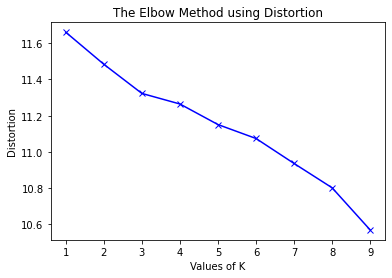

In [175]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

## 2.3 Clustering

In [176]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new


In [178]:
df_Table_scaled

array([[ 0.95726635,  0.84813944,  2.23802527, ...,  0.92192658,
        -0.11867817, -0.0997964 ],
       [ 0.95726635,  0.84813944,  2.23802527, ...,  0.92192658,
        -0.11867817, -0.0997964 ],
       [ 0.95726635,  0.84813944,  2.23802527, ...,  0.92192658,
        -0.11867817, -0.0997964 ],
       ...,
       [-0.09884258, -0.40272449, -0.32047422, ..., -1.08468508,
        -0.11867817, -0.0997964 ],
       [-0.09884258, -0.40272449, -0.32047422, ..., -1.08468508,
        -0.11867817, -0.0997964 ],
       [-0.09884258, -0.40272449, -0.32047422, ..., -1.08468508,
        -0.11867817, -0.0997964 ]])

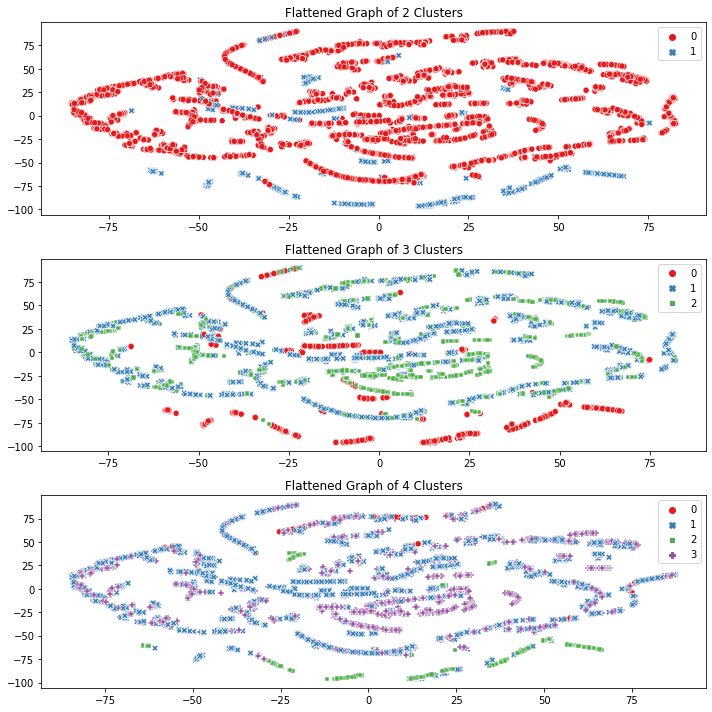

In [180]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(df_Table_scaled, 2, one_hot_encoded_data)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(df_Table_scaled, 3,one_hot_encoded_data)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(df_Table_scaled, 4,one_hot_encoded_data)

plt.tight_layout()

In [ ]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df.index, 
                                       columns=df.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return
